# Stock market analysis 📈
This project focuses on analyzing stock market data to uncover trends, evaluate performance, and support data-driven investment decisions. The analysis includes importing historical stock prices, cleaning and preparing the data, performing exploratory data analysis (EDA), and visualizing key financial metrics such as price trends, volume movements, and returns.

By using Python-based this analysis helps identify:
- Stock price patterns over time
- Volatility and momentum
- Correlations with market indices
- Opportunities for long-term or short-term investment
- Technical indicators, machine learning models for prediction
- Portfolio optimization.

In [76]:
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta
from scipy.optimize import minimize
import seaborn as sns
import plotly.graph_objects as go
import warnings
import pandas as pd
import pdb
import os
import warnings
import pdb
from datetime import timedelta
import numpy as np
import pandas as pd
from scipy.signal import argrelextrema
from statsmodels.formula.api import ols
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
# Define the directory name
directory = "Files"
# Check if it exists
if not os.path.exists(directory):
    os.makedirs(directory)
    print(f"✅ Directory '{directory}' created.")
else:
    print(f"📂 Directory '{directory}' already exists.")

📂 Directory 'Files' already exists.


User requirements and trading stratergy

In [3]:
analyze_stocks = input("""
                       Analyze stocks for:
                           1. Top performing stocks overall
                           2. Top performing stocks particular sector
                           3. User specific stocks
                       """)
period = input("Enter period to analyze all the stocks (e.g., 14d, 1mo, 6mo, 1y): ").strip()

trading_stratergy = input("""What is your trading stratergy?
                          1. Long term
                          2. Intraday
                          """)


                       Analyze stocks for:
                           1. Top performing stocks overall
                           2. Top performing stocks particular sector
                           3. User specific stocks
                        2
Enter period to analyze all the stocks (e.g., 14d, 1mo, 6mo, 1y):  6mo
What is your trading stratergy?
                          1. Long term
                          2. Intraday
                           1


## Sector stocks
Top performing stocks from various sectors

In [6]:
def sector_stocks(index, return_all = False):
    nifty50_stocks = [
        'RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS', 'ICICIBANK.NS',
        'LT.NS', 'SBIN.NS', 'HINDUNILVR.NS', 'KOTAKBANK.NS', 'ITC.NS',
        'AXISBANK.NS', 'BAJFINANCE.NS', 'MARUTI.NS', 'ASIANPAINT.NS',
        'SUNPHARMA.NS', 'TITAN.NS', 'HCLTECH.NS', 'ULTRACEMCO.NS', 'WIPRO.NS',
        'NESTLEIND.NS', 'GRASIM.NS', 'POWERGRID.NS', 'JSWSTEEL.NS', 'TECHM.NS',
        'NTPC.NS', 'BAJAJFINSV.NS', 'ADANIENT.NS', 'COALINDIA.NS', 'DRREDDY.NS',
        'HEROMOTOCO.NS', 'CIPLA.NS', 'BRITANNIA.NS', 'DIVISLAB.NS', 'TATAMOTORS.NS',
        'BPCL.NS', 'EICHERMOT.NS', 'M&M.NS', 'HINDALCO.NS', 'BHARTIARTL.NS',
        'TATASTEEL.NS', 'ONGC.NS', 'INDUSINDBK.NS', 'UPL.NS', 'SHREECEM.NS',
        'BAJAJ-AUTO.NS', 'SBILIFE.NS', 'APOLLOHOSP.NS', 'HDFCLIFE.NS', 'ICICIPRULI.NS'
    ]
    
    ai_stocks_nse = [
        "TATAELXSI.NS",      # Tata Elxsi – AI in automotive, healthcare, media
        "LTTS.NS",           # L&T Technology Services – AI + IoT + embedded
        "PERSISTENT.NS",     # Persistent Systems – AI/ML in cloud apps
        "TECHM.NS",          # Tech Mahindra – Gen AI platforms, NLP
        "INFY.NS",           # Infosys – AI for automation & business analytics
        "TCS.NS",            # TCS – AI consulting, cloud, and IP platforms
        "HCLTECH.NS",        # HCLTech – AI in cybersecurity & automation
        "COFORGE.NS",        # Coforge – AI-driven digital transformation
        "MPHASIS.NS",        # Mphasis – Applied AI for finance and insurance
        "WIPRO.NS"           # Wipro – Generative AI, ML platforms
    ]
    
    
    defence_stocks = [
    "HAL.NS",         # Hindustan Aeronautics Ltd – Fighter jets, helicopters
    "BEL.NS",         # Bharat Electronics Ltd – Radars, avionics, electronics
    "BDL.NS",         # Manufacturer of missiles: Akash, Astra, Milan, and torpedoes
    "BEML.NS",        # BEML Ltd – Military trucks, earthmovers
    "MAZDOCK.NS",     # Mazagon Dock – Warship & submarine builder
    "COCHINSHIP.NS",  # Cochin Shipyard – Naval ships, aircraft carriers
    "MTARTECH.NS",    # MTAR Technologies – Precision components for DRDO/ISRO
    "DATA PATTERNS.NS",# Data Patterns – Defense electronics and systems
    # "TANEJAERO.NS",   # Taneja Aerospace – Aircraft parts, airfield infrastructure
    "SOLARA.NS",      # Solara Active Pharma (indirectly contributes to defense health)
    "SOLARINDS.NS",   # Solar industries
    "PARAS.NS",       # Paras Defence – Space, optics, electronics
    "TITAGARH.NS",     # Titagarh Rail Systems – Defense wagons, naval components
    "DYNAMATECH.NS",  # Dynamatic Technologies – Aerospace & defense systems
    "IDEAFORGE.NS",   # ideaForge Technology – Military-grade drones
    "ASTRA.MICRO.NS", # Astra Microwave – Defense radars and RF systems
    "MIRZAINT.NS"     # Mirza International – Military boots, apparel (indirect)
    "DCXINDIA.NS"     # DCX Systems operates in system integration, cable & wire harness fabrication, and electronics for defense and aerospace sectors
    
]
    
    pharma_stocks_nse = [
        "SUNPHARMA.NS",       # Sun Pharmaceutical Industries
        "DIVISLAB.NS",        # Divi's Laboratories
        "DRREDDY.NS",         # Dr. Reddy's Laboratories
        "CIPLA.NS",           # Cipla Ltd
        "AUROPHARMA.NS",      # Aurobindo Pharma
        "LUPIN.NS",           # Lupin Ltd
        "ALKEM.NS",           # Alkem Laboratories
        "ZYDUSLIFE.NS",       # Zydus Lifesciences (formerly Cadila)
        "GLENMARK.NS",        # Glenmark Pharmaceuticals
        "BIOCON.NS",          # Biocon Ltd
        "IPCALAB.NS",         # Ipca Laboratories
        "TORNTPHARM.NS",      # Torrent Pharmaceuticals
        "ABBOTINDIA.NS",      # Abbott India
        "PFIZER.NS",          # Pfizer India
        "SANOFI.NS",          # Sanofi India
        "NATCOPHARM.NS",      # Natco Pharma
        "ERIS.NS",            # Eris Lifesciences
        "AJANTPHARM.NS",      # Ajanta Pharma
        "GLAND.NS",           # Gland Pharma
        "JUBLINGREA.NS"       # Jubilant Ingrevia (pharma + chemicals)
    ]
    
    energy_stocks_nse = [
        "RELIANCE.NS",     # Reliance Industries - Oil, gas, green energy
        "ONGC.NS",         # Oil & Natural Gas Corporation - Exploration
        "IOC.NS",          # Indian Oil Corporation - Refining & retail
        "BPCL.NS",         # Bharat Petroleum - Oil marketing
        "HPCL.NS",         # Hindustan Petroleum - Oil marketing
        "GAIL.NS",         # Gas Authority of India - Gas distribution
        "NTPC.NS",         # National Thermal Power Corp - Power generation
        "POWERGRID.NS",    # Power Grid Corp - Transmission
        "TATAPOWER.NS",    # Tata Power - Conventional + solar
        "ADANIGREEN.NS",   # Adani Green Energy - Renewable energy
        "ADANITRANS.NS",   # Adani Transmission
        "ADANIPOWER.NS",   # Adani Power - Thermal
        "NHPC.NS",         # National Hydro Power Corp - Hydro
        "SJVN.NS",         # Satluj Jal Vidyut Nigam - Hydro + solar
        "COALINDIA.NS",    # Coal India - Coal mining
        "JSWENERGY.NS",    # JSW Energy - Thermal + renewables
        "TORNTPOWER.NS",   # Torrent Power - Generation + distribution
        "KPIGREEN.NS",     # K.P.I. Green Energy - Solar developer
        "INOXWIND.NS",     # Inox Wind - Wind turbine manufacturer
        "IGL.NS",          # Indraprastha Gas Ltd - Gas distribution
        "MGL.NS"           # Mahanagar Gas Ltd - City gas distribution
    ]
    
    fmcg_stocks_nse = [
        "HINDUNILVR.NS",   # Hindustan Unilever – Market leader in personal/home care
        "ITC.NS",          # ITC – Cigarettes, foods, personal care
        "NESTLEIND.NS",    # Nestle India – Packaged foods, beverages
        "BRITANNIA.NS",    # Britannia Industries – Biscuits, dairy, bakery
        "DABUR.NS",        # Dabur India – Ayurvedic and healthcare products
        "MARICO.NS",       # Marico – Hair oil, edible oil (Parachute, Saffola)
        "COLPAL.NS",       # Colgate-Palmolive – Oral care
        "EMAMILTD.NS",     # Emami – Personal care & healthcare
        "GODREJCP.NS",     # Godrej Consumer – Household & personal care
        "BAJAJCON.NS",     # Bajaj Consumer – Hair oil
        "HATSUN.NS",       # Hatsun Agro – Dairy products
        "AVANTIFEED.NS",   # Avanti Feeds – Aqua feed (semi-FMCG)
        "HERITGFOOD.NS",   # Heritage Foods – Dairy
        "VSTIND.NS",       # VST Industries – Tobacco (smaller than ITC)
        "ZYDUSWELL.NS",    # Zydus Wellness – Nutraceuticals, wellness
        "PATANJALI.NS",    # Patanjali Foods – Edible oil, FMCG (Ruchi Soya rebranded)
        "VARUNBEVER.NS",   # Varun Beverages – PepsiCo bottling partner
        "RADICO.NS",       # Radico Khaitan – Liquor (FMCG-beverage)
        "MANPASAND.NS",    # Manpasand Beverages (low volume/illiquid)
        "TASTYBITE.NS"     # Tasty Bite – Ready-to-eat food (small-cap)
    ]
    
    banking_stocks_nse = [
        # 🔵 Private Sector Banks
        "HDFCBANK.NS",       # HDFC Bank
        "ICICIBANK.NS",      # ICICI Bank
        "AXISBANK.NS",       # Axis Bank
        "KOTAKBANK.NS",      # Kotak Mahindra Bank
        "INDUSINDBK.NS",     # IndusInd Bank
        "IDFCFIRSTB.NS",     # IDFC First Bank
        "RBLBANK.NS",        # RBL Bank
        "CSBBANK.NS",        # CSB Bank
        "DCBBANK.NS",        # DCB Bank
        "YESBANK.NS",        # Yes Bank
        "KARURVYSYA.NS",     # Karur Vysya Bank
        "SOUTHBANK.NS",      # South Indian Bank
        "CITYUNION.NS",      # City Union Bank
    
        # 🔴 Public Sector Banks (PSBs)
        "SBIN.NS",           # State Bank of India
        "BANKBARODA.NS",     # Bank of Baroda
        "PNB.NS",            # Punjab National Bank
        "UNIONBANK.NS",      # Union Bank of India
        "CANBK.NS",          # Canara Bank
        "INDIANB.NS",        # Indian Bank
        "BANKINDIA.NS",      # Bank of India
        "UCOBANK.NS",        # UCO Bank
        "IOB.NS",            # Indian Overseas Bank
        "CENTRALBK.NS",      # Central Bank of India
        "MAHABANK.NS"        # Bank of Maharashtra
    ]
    
    infra_stocks_nse = [
        # 🚧 Core Infra & EPC (Engineering, Procurement, Construction)
        "LT.NS",             # Larsen & Toubro – Engineering & construction leader
        "NBCC.NS",           # NBCC (India) – Govt infra developer
        "IRCON.NS",          # IRCON International – Railways infra
        "RVNL.NS",           # Rail Vikas Nigam Ltd – Rail infra execution
        "PNCINFRA.NS",       # PNC Infratech – Roads & highways
        "KNRCON.NS",         # KNR Constructions – Roads & irrigation
        "HGINFRA.NS",        # H.G. Infra – Highway contractor
        "NCC.NS",            # NCC Ltd – Multi-sector infrastructure
        "ASHOKA.NS",         # Ashoka Buildcon – Roads, bridges, power
        "GPTINFRA.NS",       # GPT Infraprojects – Civil & rail infrastructure
    
        # 🛣️ Roads & Highways (HAM/EPC)
        "DILIPBUILCON.NS",   # Dilip Buildcon – Large road infra player
        "IRB.NS",            # IRB Infra – Toll operator, highways
        "HGIEL.NS",          # H.G. Infra Engineering Ltd
    
        # ⚡ Power & Utility Infra
        "POWERGRID.NS",      # Power Grid Corp – Power transmission infra
        "NTPC.NS",           # NTPC – Power generation
        "RECLTD.NS",         # Rural Electrification Corp – Power finance
        "PFC.NS",            # Power Finance Corp
    
        # ⚓ Ports & Transport Infra
        "ADANIPORTS.NS",     # Adani Ports – Ports, logistics
        "CONCOR.NS",         # Container Corp – Rail logistics
        "GMRINFRA.NS",       # GMR Airports Infra – Airports, urban infra
        "APLAPOLLO.NS",      # Apollo Tubes – Structural steel (infra input)
    
        # 🏙️ Urban Infra / Smart City / Metro
        # "JMC.NS",            # JMC Projects – Urban infra, metros
        "RAJRATAN.NS",       # Rajratan Global – Tyre bead wire, industrial infra
    
        # 🧱 Materials for Infra
        "RAMCOCEM.NS",       # Ramco Cement
        "ULTRACEMCO.NS",     # UltraTech Cement
        "JKCEMENT.NS",       # JK Cement
        "STLTECH.NS",        # Sterlite Tech – Optical infra for smart cities
    ]
    
    metal_stocks_nse = [
        "TATASTEEL.NS",      # Tata Steel – Integrated steel producer
        "JSWSTEEL.NS",       # JSW Steel – Leading private sector steelmaker
        "SAIL.NS",           # Steel Authority of India – Govt-owned steel PSU
        "HINDALCO.NS",       # Hindalco – Aluminum & copper (Aditya Birla Group)
        "VEDL.NS",           # Vedanta Ltd – Diversified metals & mining
        "NMDC.NS",           # NMDC – Iron ore mining PSU
        "NATIONALUM.NS",     # National Aluminium Co. – PSU aluminum producer
        "JINDALSTEL.NS",     # Jindal Steel & Power – Steel & power
        "RATNAMANI.NS",      # Ratnamani Metals – Steel tubes & pipes
        "APLAPOLLO.NS",      # APL Apollo – Structural steel pipes
        "MOIL.NS",           # Manganese Ore India Ltd – PSU manganese miner
        "HINDZINC.NS",       # Hindustan Zinc – Zinc & silver mining (Vedanta)
        "WELCORP.NS",        # Welspun Corp – Pipes (oil & gas sector)
        "MASTEK.NS",         # (Possible misclassified – tech, not metals)
        "SHYAMMETL.NS",      # Shyam Metalics – Ferrous metals & ferroalloys
        "JSWISPL.NS",        # JSW Ispat – Steel products (subsidiary of JSW)
        "TUNGAMETAL.NS",     # Tungabhadra Steel – Small-cap alloy maker
        "MANAKALUCO.NS",     # Manaksia Aluminium – Non-ferrous
        "SANDUMA.NS",        # Sandur Manganese – Iron ore & manganese
    ]
    
    gold_etf_nse  = [
    "GOLDBEES.NS",     # Nippon India Gold BeES – Most liquid and oldest gold ETF in India
    "HDFCMFGETF.NS",   # HDFC Gold ETF – Managed by HDFC Mutual Fund, well-established
    "GOLDIETF.NS",     # ICICI Prudential Gold ETF – Popular, low tracking error
    "KOTAKGOLD.NS",    # Kotak Gold ETF – Offered by Kotak Mutual Fund
    "SBIGETS.NS",      # SBI Gold ETF – From SBI Mutual Fund, large AUM
    "GOLDSHARE.NS",    # UTI Gold ETF – Managed by UTI Mutual Fund
    "BSLGOLDETF.NS",   # Aditya Birla Sun Life Gold ETF – Competitive expense ratio
    "AXISGOLD.NS",     # Axis Gold ETF – Offered by Axis Mutual Fund
    "QGOLDHALF.NS",    # Quantum Gold ETF – Passive, low-cost, first to offer direct plan
    "IDBIGOLD.NS",     # IDBI Gold ETF – From IDBI Mutual Fund
    "IVZINGOLD.NS"     # Invesco India Gold ETF – Managed by Invesco Mutual Fund
    ]
    
    auto_stocks_nse = [
        # 🚙 Passenger & Commercial Vehicles
        "TATAMOTORS.NS",       # Tata Motors – PVs, CVs, EVs (owns Jaguar-Land Rover)
        "MAHINDRA.NS",         # Mahindra & Mahindra – SUVs, tractors, EVs
        "MARUTI.NS",           # Maruti Suzuki – India’s largest passenger car maker
        "ASHOKLEY.NS",         # Ashok Leyland – Commercial vehicles
        "EICHERMOT.NS",        # Eicher Motors – Royal Enfield & trucks (VECV)
        "FORCEMOT.NS",         # Force Motors – Commercial vehicles
        "SMLISUZU.NS",         # SML Isuzu – Trucks, buses
    
        # 🛵 Two-Wheelers & Three-Wheelers
        "BAJAJ-AUTO.NS",       # Bajaj Auto – Motorcycles & 3-wheelers
        "TVSMOTOR.NS",         # TVS Motor – 2-wheelers, electric scooters
        "HEROMOTOCO.NS",       # Hero MotoCorp – World's largest 2-wheeler maker
        "ATULAUTO.NS",         # Atul Auto – 3-wheelers
    
        # 🔋 EV & Battery Linked
        "OLECTRA.NS",          # Olectra Greentech – Electric buses
        "GREAVESCOT.NS",       # Greaves Cotton – EV powertrains
        "AMARAJABAT.NS",       # Amara Raja Batteries
        "EXIDEIND.NS",         # Exide Industries – Batteries, EV tie-ups
    
        # 🔧 Auto Ancillaries
        "BOSCHLTD.NS",         # Bosch India – Auto components, electronics
        "MOTHERSUMI.NS",       # Samvardhana Motherson – Wiring, mirrors, modules
        "SONA.BLW.NS",         # Sona BLW Precision – EV & ICE drivetrain
        "ENDURANCE.NS",        # Endurance Tech – Suspension, brakes
        "SCHAEFFLER.NS",       # Schaeffler India – Bearings, engine systems
        "VARROC.NS",           # Varroc Engineering – Lighting, EV parts
    
        # 🛞 Tyre Manufacturers
        "MRF.NS",              # MRF Ltd
        "APOLLOTYRE.NS",       # Apollo Tyres
        "CEATLTD.NS",          # CEAT
        "BALKRISIND.NS",       # Balkrishna Industries – Off-road tyres
        "JKTYRE.NS",           # JK Tyre
        "TVSSRICHAK.NS",       # TVS Srichakra
    
        # 🚜 Tractors & Agri Vehicles
        "ESCORTS.NS"           # Escorts Kubota – Tractors, railway components
    ]
    
    chemical_stocks_nse = [
        # 🔬 Specialty Chemicals
        "AARTIIND.NS",       # Aarti Industries – Specialty & pharma intermediates
        "NAVINFLUOR.NS",     # Navin Fluorine – Fluorochemicals
        "SRF.NS",            # SRF Ltd – Fluorochemicals, packaging films
        "PIIND.NS",          # PI Industries – Agrochemicals + CRAMS
        "FINEORG.NS",        # Fine Organic – Oleochemicals
        "ALKYLAMINE.NS",     # Alkyl Amines – Aliphatic amines
        "BALAMINES.NS",      # Balaji Amines – Amines & derivatives
        "DEEPAKNTR.NS",      # Deepak Nitrite – Phenol, acetone, nitrites
        "VINATIORGA.NS",     # Vinati Organics – ATBS, IBB (specialty chemicals)
        "TATACHEM.NS",       # Tata Chemicals – Soda ash, nutraceuticals
        "LAURUSLABS.NS",     # Laurus Labs – APIs & pharma chemicals
        "GUJALKALI.NS",      # Gujarat Alkalies – Caustic soda, chlorine
        "GHCL.NS",           # GHCL – Soda ash, textiles
        "CHEMPLASTS.NS",     # Chemplast Sanmar – PVC & specialty pastes
        "HEUBACHIND.NS",     # Heubach Colorants (formerly Clariant) – Pigments
        "RELCHEMQ.NS",       # Reliance Chemotex – Industrial chemicals
        "JUBLINGREA.NS",     # Jubilant Ingrevia – Chemicals, life science ingredients
    
        # 🌾 Agrochemicals
        "RALLIS.NS",         # Rallis India – Tata Group, agrochemicals
        "BHARATRAS.NS",      # Bharat Rasayan – Pesticides, technicals
        "BASF.NS",           # BASF India – Global agro and industrial chemical MNC
        "DHANUKA.NS",        # Dhanuka Agritech – Pesticides
        "INSECTICID.NS",     # Insecticides India – Agrochemicals
        "HERANBA.NS",        # Heranba Industries – Crop protection chemicals
    
        # ⚗️ Industrial / Bulk Chemicals
        "DCW.NS",            # DCW Ltd – Caustic soda, PVC
        "TANLA.NS",          # (Note: This is a tech stock, not chemical. Skip if mislisted.)
        "ALKEM.NS",          # Alkem Labs – (Mostly pharma; minor chemical exposure)
        "MEGH.NS",           # Meghmani Organics – Pigments, agrochemicals
        "KPRMILL.NS"         # (Primarily textile; check if chemical division relevant)
    ]
    
    if return_all == False:
        if index   == 1:
            return nifty50_stocks
        elif index == 2:
            return ai_stocks_nse
        elif index == 3:
            return defence_stocks
        elif index == 4:
            return pharma_stocks_nse
        elif index == 5:
            return energy_stocks_nse
        elif index == 6:
            return fmcg_stocks_nse
        elif index == 7:
            return banking_stocks_nse
        elif index == 8:
            return infra_stocks_nse
        elif index == 9:
            return metal_stocks_nse
        elif index == 10:
            return gold_etf_nse
        elif index == 11:
            return auto_stocks_nse
        elif index == 12:
            return chemical_stocks_nse
    else:
        stocks = list(set(nifty50_stocks + ai_stocks_nse + defence_stocks + pharma_stocks_nse + 
                          energy_stocks_nse + fmcg_stocks_nse + banking_stocks_nse + infra_stocks_nse + 
                         metal_stocks_nse + gold_etf_nse + auto_stocks_nse +  chemical_stocks_nse ))
        return stocks

## Display top stocks
Shortlists the top performing stocks over a period from various choices

In [9]:
def display_top_stocks(tickers, period):
    # Download last 6 months of data
    data = yf.download(tickers, period=period, interval="1d")['Close']

    # Drop columns with all NaNs (if any ticker didn't download)
    data = data.dropna(axis=1, how='all')

    # Calculate percentage return
    returns = (data.iloc[-1] - data.iloc[0]) / data.iloc[0] * 100
    returns = returns.sort_values(ascending=False)

    # Display best performing stocks
    print(f"📈 Best Performing Stocks in {period}:")
    print(returns)
    returns.to_csv(f"returns_{period}.csv", header=["% Return"])
    
    # Compute volatility
    daily_returns = data.pct_change().dropna()

    volatility = daily_returns.std() * 100  # Daily volatility in %
    annual_volatility = daily_returns.std() * np.sqrt(252) * 100  # Annualized
    
    # Combine into DataFrame
    vol_df = pd.DataFrame({
        "Daily Volatility (%)": volatility.round(2),
        "Annualized Volatility (%)": annual_volatility.round(2)
    }).sort_values(by="Annualized Volatility (%)", ascending=False)
    
    # Save to CSV
    vol_df.to_csv(f"Files//volatility_{period}.csv")
    
    # Print
    print(f"📊 Volatility (period: {period}) saved to 'volatility_{period}.csv'")
    print(vol_df)
    
    
    
    # Get top 10 performers
    top_10 = returns.sort_values(ascending=False).head(10).index.tolist()

    # Normalize data for top 10
    normalized = data[top_10] / data[top_10].iloc[0] * 100
    
    # Plot
    plt.figure(figsize=(12, 6))
    for col in normalized.columns:
        plt.plot(normalized.index, normalized[col], label=col)

    plt.title(f"Top 10 Performing Stocks ({period})")
    plt.xlabel("Date")
    plt.ylabel("Normalized Price (Start = 100)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Plot 10 most stable stocks
    top_stable = vol_df.tail(10)
    
    plt.figure(figsize=(10, 6))
    plt.barh(top_stable.index, top_stable["Annualized Volatility (%)"], color='teal')
    plt.xlabel("Annualized Volatility (%)")
    plt.title("10 Most Stable Stocks (Lowest Volatility)")
    plt.gca().invert_yaxis()  # lowest volatility at top
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()
    
    # --- Combine into DataFrame ---
    df = pd.DataFrame({
        "Returns (%)": returns.round(2),
        "Annualized Volatility (%)": annual_volatility.round(2)
    })
    
    # --- Sharpe Ratio (returns / risk) ---
    df["Sharpe Ratio"] = (df["Returns (%)"] / df["Annualized Volatility (%)"]).round(2)
    
    # --- Selection Criteria ---
    median_vol = df["Annualized Volatility (%)"].median()
    
    # Top 5 by Sharpe
    top_sharpe = df.sort_values(by="Sharpe Ratio", ascending=False).head(5)
    
    # High-return, low-volatility filter
    filtered = df[(df["Returns (%)"] > 5) & (df["Annualized Volatility (%)"] < median_vol)]
    
    # --- Save Results ---
    df.to_csv(f"Files//full_analysis_{period}.csv")
    top_sharpe.to_csv(f"top_sharpe_{period}.csv")
    filtered.to_csv(f"Files//high_return_low_volatility_{period}.csv")
    
    # --- Display Output ---
    print(f"\n✅ Full analysis saved to 'full_analysis_{period}.csv'")
    print("\n📊 Top 5 by Sharpe Ratio:")
    print(top_sharpe)
    
    print("\n📉 High-return, Low-volatility Picks:")
    print(filtered)
    
    # Top 3 by Sharpe and Returns
    top_sharpe_tickers = df.sort_values(by="Sharpe Ratio", ascending=False).head(3).index
    top_return_tickers = df.sort_values(by="Returns (%)", ascending=False).head(3).index
    
    # Assign colors
    colors = []
    for ticker in df.index:
        if ticker in top_sharpe_tickers:
            colors.append('green')
        elif ticker in top_return_tickers:
            colors.append('blue')
        else:
            colors.append('gray')
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df["Sharpe Ratio"], df["Returns (%)"], c=colors, s=100, edgecolors='black')
    
    # Annotate each point
    for ticker in df.index:
        plt.annotate(ticker, 
                     (df.loc[ticker, "Sharpe Ratio"], df.loc[ticker, "Returns (%)"]),
                     textcoords="offset points", xytext=(5, 5), ha='left', fontsize=9)
    
    # Labels and styling
    plt.xlabel("Sharpe Ratio (Return / Volatility)")
    plt.ylabel("Returns (%)")
    plt.title("Sharpe Ratio vs Returns (Top Performers Highlighted)")
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
    plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Optimise portfolio
Fetch data from varios stocks and allocates the amount to invest as per the user budget

In [12]:
def optimise_portfolio(all_tickers, period, ticker_type):
    # ----------------- USER INPUTS -------------------
    
    budget = float(input("💰 Enter your total investment budget (e.g., 100000): "))

    # ----------------- FETCH PRICE DATA -------------------
    data = yf.download(all_tickers, period=period)['Close']
    data = data.dropna(axis=1, thresh=len(data) * 0.9)  # remove stocks with missing data
    returns = data.pct_change().dropna()
    
    # ----------------- SHARPE RATIO CALC -------------------
    annual_returns = returns.mean() * 252
    annual_volatility = returns.std() * np.sqrt(252)
    sharpe_ratio = annual_returns / annual_volatility
    
    top5_tickers = sharpe_ratio.sort_values(ascending=False).head(5).index.tolist()
    print("\n📈 Top 5 Stocks by Sharpe Ratio:")
    print(top5_tickers)
    
    # ----------------- OPTIMIZATION -------------------
    top_returns = returns[top5_tickers]
    
    def portfolio_perf(weights):
        ret = np.sum(top_returns.mean() * weights) * 252
        vol = np.sqrt(np.dot(weights.T, np.dot(top_returns.cov() * 252, weights)))
        sharpe = ret / vol
        return ret, vol, sharpe
    
    def neg_sharpe(weights):
        return -portfolio_perf(weights)[2]
    
    num_assets = len(top5_tickers)
    bounds = tuple((0, 1) for _ in range(num_assets))
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    init_guess = [1/num_assets] * num_assets
    
    result = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=constraints)
    weights = result.x
    
    # ----------------- ALLOCATION BASED ON BUDGET -------------------
    latest_prices = data[top5_tickers].iloc[-1]
    allocation_df = pd.DataFrame({
        'Ticker': top5_tickers,
        'Weight': weights,
        'Latest Price': latest_prices
    })
    
    allocation_df['Allocated Amount'] = allocation_df['Weight'] * budget
    allocation_df['Shares to Buy'] = (allocation_df['Allocated Amount'] / allocation_df['Latest Price']).astype(int)
    allocation_df['Actual Invested'] = allocation_df['Shares to Buy'] * allocation_df['Latest Price']
    if ticker_type == 'all':
        allocation_df.to_csv('Files//Optimised_portfolio_all_sectors.csv')
    elif ticker_type == 'sector':
        allocation_df.to_csv('Files//Optimised_portfolio_specific_sector.csv')
    elif ticker_type == 'user':
        allocation_df.to_csv('Files//Optimised_portfolio_specific_sector.csv')
    # ----------------- SUMMARY -------------------
    total_invested = allocation_df['Actual Invested'].sum()
    remaining_cash = budget - total_invested
    
    print("\n📊 Optimized Allocation:")
    print(allocation_df[['Ticker', 'Weight', 'Shares to Buy', 'Actual Invested']])
    
    print(f"\n✅ Total Invested: ₹{total_invested:.2f}")
    print(f"💰 Remaining Cash: ₹{remaining_cash:.2f}")
    
    # ----------------- PIE CHART -------------------
    plt.figure(figsize=(7, 6))
    plt.pie(allocation_df['Actual Invested'], labels=allocation_df['Ticker'],
            autopct='%1.1f%%', startangle=90)
    plt.title("Investment Allocation (Top 5 Sharpe Stocks)")
    plt.tight_layout()
    if ticker_type == 'all':
        plt.savefig('Files//Investment_Allocation_all_sectors.png')
    elif ticker_type == 'sector':
        plt.savefig('Files//Investment_Allocation__specific_sector.png')
    elif ticker_type == 'user':
        plt.savefig('Files//Investment_Allocation_user.png')
    plt.show()
    return allocation_df, total_invested, remaining_cash

## Identify top stocks as per user requirement
1. All stocks
2. Promps for a sector and selects top performing stocks for that sector
3. User shortlisted stocks

Choose a sector:
1. NIFTY50
2. AI
3. DEFENSE
4. PHARMA
5. ENERGY
6. FMCG
7. BANKING
8. INFRA
9. METALS
10. GOLD ETF
11. AUTO
12. CHEMICALS


Enter your sector choice (1-12):  3



You selected: DEFENSE Stocks


[**********************75%***********            ]  12 of 16 completedHTTP Error 404: 
HTTP Error 404: 
[*********************100%***********************]  16 of 16 completed

3 Failed downloads:
['DATA PATTERNS.NS', 'ASTRA.MICRO.NS', 'MIRZAINT.NSDCXINDIA.NS']: YFPricesMissingError('possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")')


📈 Best Performing Stocks in 6mo:
Ticker
SOLARINDS.NS     66.984294
PARAS.NS         64.411030
BDL.NS           58.216659
BEL.NS           53.428112
MAZDOCK.NS       46.939370
COCHINSHIP.NS    41.362449
BEML.NS          25.158023
HAL.NS           23.764855
IDEAFORGE.NS     -0.498158
SOLARA.NS        -5.132127
MTARTECH.NS      -6.490488
DYNAMATECH.NS    -6.550811
TITAGARH.NS      -8.642335
dtype: float64
📊 Volatility (period: 6mo) saved to 'volatility_6mo.csv'
               Daily Volatility (%)  Annualized Volatility (%)
Ticker                                                        
IDEAFORGE.NS                   4.23                      67.18
PARAS.NS                       4.04                      64.08
MAZDOCK.NS                     3.58                      56.79
SOLARA.NS                      3.57                      56.60
BEML.NS                        3.53                      56.11
COCHINSHIP.NS                  3.50                      55.48
BDL.NS                         3.

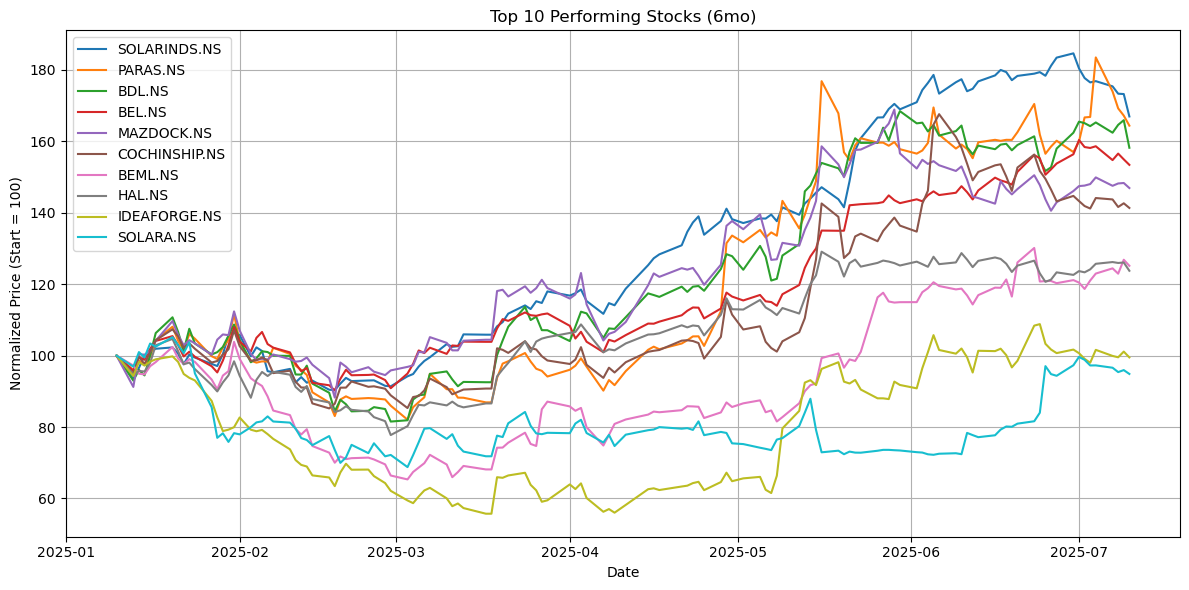

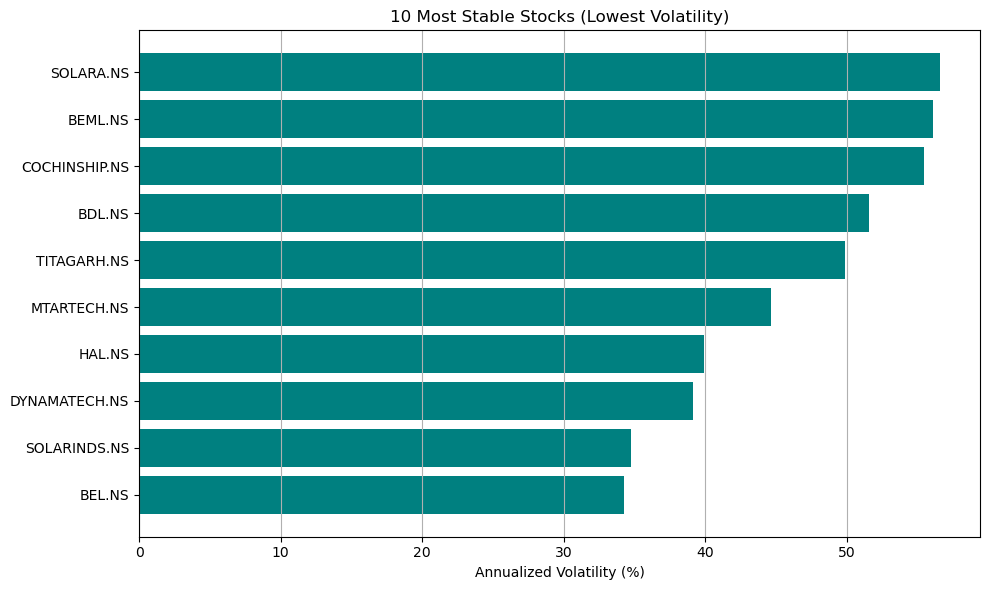


✅ Full analysis saved to 'full_analysis_6mo.csv'

📊 Top 5 by Sharpe Ratio:
              Returns (%)  Annualized Volatility (%)  Sharpe Ratio
Ticker                                                            
SOLARINDS.NS        66.98                      34.73          1.93
BEL.NS              53.43                      34.30          1.56
BDL.NS              58.22                      51.57          1.13
PARAS.NS            64.41                      64.08          1.01
MAZDOCK.NS          46.94                      56.79          0.83

📉 High-return, Low-volatility Picks:
              Returns (%)  Annualized Volatility (%)  Sharpe Ratio
Ticker                                                            
BEL.NS              53.43                      34.30          1.56
HAL.NS              23.76                      39.95          0.59
SOLARINDS.NS        66.98                      34.73          1.93


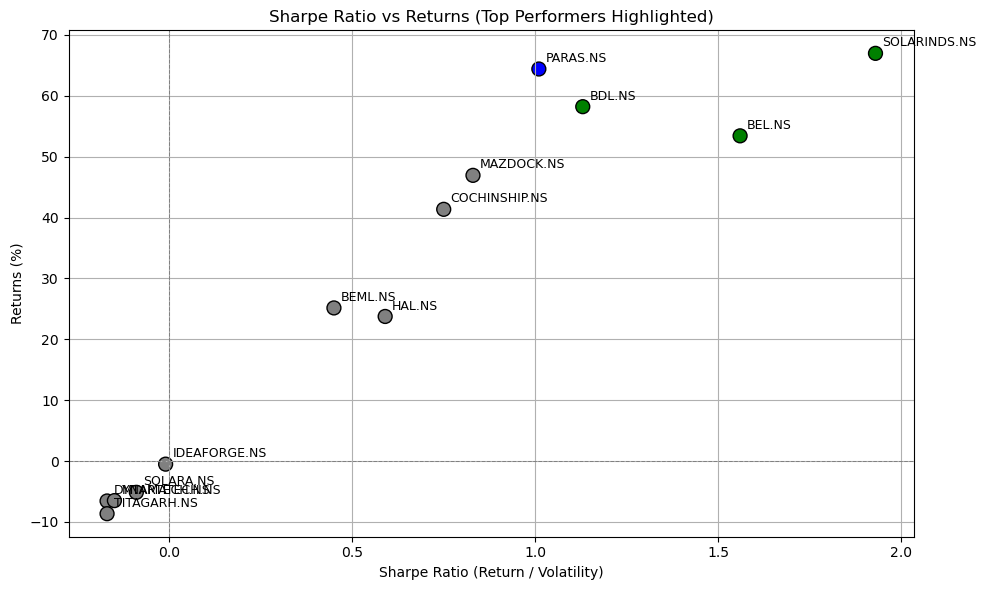

💰 Enter your total investment budget (e.g., 100000):  50000


[*********************100%***********************]  16 of 16 completed

3 Failed downloads:
['ASTRA.MICRO.NS', 'DATA PATTERNS.NS', 'MIRZAINT.NSDCXINDIA.NS']: YFPricesMissingError('possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")')



📈 Top 5 Stocks by Sharpe Ratio:
['SOLARINDS.NS', 'BEL.NS', 'BDL.NS', 'PARAS.NS', 'MAZDOCK.NS']

📊 Optimized Allocation:
                    Ticker        Weight  Shares to Buy  Actual Invested
Ticker                                                                  
SOLARINDS.NS  SOLARINDS.NS  6.622131e-01              2     31808.000000
BEL.NS              BEL.NS  3.046011e-01             36     14886.000000
BDL.NS              BDL.NS  0.000000e+00              0         0.000000
PARAS.NS          PARAS.NS  3.318581e-02              1       836.400024
MAZDOCK.NS      MAZDOCK.NS  1.331400e-16              0         0.000000

✅ Total Invested: ₹47530.40
💰 Remaining Cash: ₹2469.60


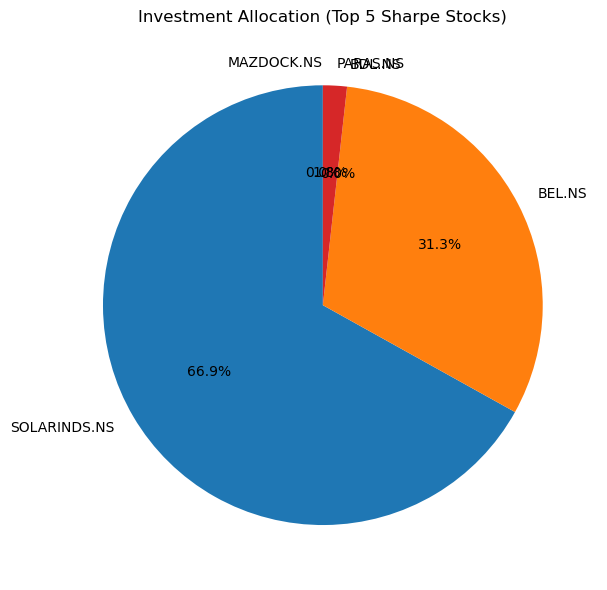

Choose a sector:
1. HAL
2. BEL
3. BDL
4. BEML
5. MAZDOCK
6. COCHINSHIP
7. MTARTECH
8. DATA PATTERNS
9. SOLARA
10. SOLARINDS
11. PARAS
12. TITAGARH
13. DYNAMATECH
14. IDEAFORGE
15. ASTRA
16. MIRZAINT


Enter your stock choice (1-16):  14



You selected: IDEAFORGE


In [15]:
# =============================================================================
# Identify top stocks
# =============================================================================
# List of NSE stock tickers
if analyze_stocks == '1':
    tickers_all = sector_stocks(0, return_all = True)
    display_top_stocks(tickers_all, period)
   

    # =============================================================================
    # Optimise portfolio for all the sectors
    # =============================================================================
    allocation_df, total_invested, remaining_cash = optimise_portfolio(tickers_all,ticker_type = 'all',period = period)


# =============================================================================
# Prompt for sector
# =============================================================================
elif analyze_stocks == '2':
    sectors = ['NIFTY50', 'AI', 'DEFENSE', 'PHARMA', 'ENERGY', 'FMCG', 'BANKING', 'INFRA', 'METALS', 'GOLD ETF','AUTO', 'CHEMICALS']
    print("Choose a sector:")
    for i, prompt in enumerate(sectors, start=1):
        print(f"{i}. {prompt}")
    sector_choice = int(input(f"Enter your sector choice (1-{len(sectors)}): "))    
    if 1 <= sector_choice <= len(sectors):
        selected_prompt = sectors[sector_choice - 1]
        print(f"\nYou selected: {selected_prompt} Stocks")
    else:
        print("Invalid choice!")
    
    sel_sect_tickers = sector_stocks(sector_choice)
    display_top_stocks(sel_sect_tickers, period=period)
    # =============================================================================
    # Optimise portfolio for given sector
    # =============================================================================
    allocation_df_sect, total_invested_sect, remaining_cash_sect = optimise_portfolio(sel_sect_tickers,ticker_type='sector',period = period)

    # =============================================================================
    # Prompt for a particular stock in a sector
    # =============================================================================
    print("Choose a sector:")
    for i, prompt in enumerate(sel_sect_tickers, start=1):
        print(f"{i}. {prompt.split('.')[0]}")
    stock_choice = int(input(f"Enter your stock choice (1-{len(sel_sect_tickers)}): "))    
    if 1 <= stock_choice <= len(sel_sect_tickers):
        selected_prompt = sel_sect_tickers[stock_choice - 1]
        print(f"\nYou selected: {selected_prompt.split('.')[0]}")
    else:
        print("Invalid choice!")
    tickers = [selected_prompt]

elif analyze_stocks == '3': 
    # =============================================================================
    # Optimise portfolio for user specific stocks
    # =============================================================================
    user_stocks = ['HAL.NS','MAZDOCK.NS','COCHINSHIP.NS','IDEAFORGE.NS','PARAS.NS','M&M.NS']
    allocation_df_user, total_invested_user, remaining_cash_user = optimise_portfolio(user_stocks,ticker_type='user',period = period)

    for i, prompt in enumerate(user_stocks, start=1):
        print(f"{i}. {prompt.split('.')[0]}")
    stock_choice = int(input(f"Enter your stock choice (1-{len(user_stocks)}): "))    
    if 1 <= stock_choice <= len(user_stocks):
        selected_prompt = user_stocks[stock_choice - 1]
        print(f"\nYou selected: {selected_prompt.split('.')[0]}")
    else:
        print("Invalid choice!")
    tickers = [selected_prompt]

## Plot moving average of the stock
- Plot 50 day and 200 day time average data
- Show crossover dates
- Golden Cross = 50_DMA crosses above 200_DMA → Signal changes from -1 to 1 (Crossover = 2)
- Death Cross = 50_DMA crosses below 200_DMA → Signal changes from 1 to -1 (Crossover = -2)
- Analyze correlations

In [17]:
def moving_average(tickers):
    df = yf.download(tickers, period="5y", interval="1d")
    discription = df.describe()

    # Calculate 50 DMA and 200 DMA
    df['DMA_50'] = df['Close'].rolling(window=50).mean()
    df['DMA_200'] = df['Close'].rolling(window=200).mean()

    # Plot closing prices vs 50DMA and 200DMA
    sns.set_style('darkgrid')
    plt.figure(figsize = (7,5), dpi = 150)
    plt.title(f'Closing Prices vs 50 DMA & 200 DMA for {tickers[0].split(".")[0]}')
    plt.plot(df['Close'],label = 'Closing Price')
    plt.plot(df['DMA_50'],label = 'DMA_50')
    plt.plot(df['DMA_200'],label = 'DMA_200')
    plt.legend()
    plt.savefig(f'Files//Closing_Prices_{tickers[0].split(".")[0]}.png')

    # Create Plotly figure
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df.index, y=df['Close'].to_numpy().flatten(), mode='lines', name='Closing Price'))
    fig.add_trace(go.Scatter(x=df.index, y=df['DMA_50'].to_numpy().flatten(), mode='lines', name='DMA_50'))
    fig.add_trace(go.Scatter(x=df.index, y=df['DMA_200'].to_numpy().flatten(), mode='lines', name='DMA_200'))
    
    fig.update_layout(
        title={
        'text': f'Closing Prices vs 50 DMA & 200 DMA for {tickers[0].split(".")[0]}',
        'x': 0.5,  # Center the title
        'xanchor': 'center'
        },
        xaxis_title='Date',
        yaxis_title='Price',
        legend_title='Legend',
        template='plotly_white',
        font=dict(
        family='Times New Roman',
        size=14
        ),
        autosize=True,
        height=800,
        width=1400
    )
    fig.write_html(f'Files//Closing_Prices_{tickers[0].split(".")[0]}.html', auto_open=True)

    # Analyze correlation
    plt.figure(figsize = (7,7), dpi = 150)
    sns.heatmap(df.corr(),annot=True)

    # Plot distplot
    sns.set_style('darkgrid')
    plt.figure(figsize = (7,5), dpi = 150)
    plt.title('Distplot 50DMA')
    sns.distplot(df['DMA_50'])

    sns.set_style('darkgrid')
    plt.figure(figsize = (7,5), dpi = 150)
    plt.title('Distplot 200DMA')
    sns.distplot(df['DMA_200'])


    df['Signal'] = 0
    df.loc[df['DMA_50'] > df['DMA_200'], 'Signal'] = 1
    df.loc[df['DMA_50'] < df['DMA_200'], 'Signal'] = -1
    # Detect crossover points
    df['Crossover'] = df['Signal'].diff()
    # Show crossover dates
    crossovers = df[df['Crossover'].abs() == 2]  # 2 = change from 1 to -1 or vice versa

    # Golden Cross = 50_DMA crosses above 200_DMA → Signal changes from -1 to 1 (Crossover = 2)
    # Death Cross = 50_DMA crosses below 200_DMA → Signal changes from 1 to -1 (Crossover = -2)

    for date, row in crossovers.iterrows():
        if row['Crossover'].to_numpy()[0] == 2:
            print(f"🔔 Golden Cross on {date.date()} — Possible Uptrend!")
        elif row['Crossover'].to_numpy()[0] == -2:
            print(f"⚠️ Death Cross on {date.date()}  — Possible Downtrend!")


## Identify support and resistance
- Identify local minima and maxima for support and resistance
- Plot support and resistance lines
- 
            📉 Black line: Daily close price

            🟢 Dotted green line: Support trendline
            
            🔴 Dotted red line: Resistance trendline
            
            ⬆️ Green triangles: Local support points
            
            🔻 Red triangles: Local resistance points

In [20]:
def support_resistance(ticker):
    df = yf.download(ticker, period="6mo", interval="1d")
    df.dropna(inplace=True)
    
    # Identify local minima and maxima for support and resistance
    n = 5  # Number of points to consider for local extrema
    # Find extrema
    min_idx = argrelextrema(df['Low'].values, np.less_equal, order=n)[0]
    max_idx = argrelextrema(df['High'].values, np.greater_equal, order=n)[0]
    
    # Fill NaN initially
    df['min'] = np.nan
    df['max'] = np.nan
    
    # ✅ Use iloc for position-based assignment
    df.iloc[min_idx, df.columns.get_loc('min')] = df.iloc[min_idx, df.columns.get_loc('Low')]
    df.iloc[max_idx, df.columns.get_loc('max')] = df.iloc[max_idx, df.columns.get_loc('High')]
    
    df1 = df.copy()
    # Remove NaN for support and resistance lines
    df1.columns = [''.join(col) if isinstance(col, tuple) else col for col in df.columns]
    support_points = df1.dropna(subset=['min'])
    resistance_points = df1.dropna(subset=['max'])
    
    # Initialize candlestick chart
    fig = go.Figure(data=[go.Candlestick(
        x=df.index,
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
        name="Candlestick"
    )])
    
    # Add support line
    if len(support_points) >= 2:
        support_line = np.polyfit(support_points.index.map(pd.Timestamp.toordinal), support_points['min'], 1)
        support_trend = np.poly1d(support_line)
        fig.add_trace(go.Scatter(
            x=df.index,
            y=support_trend(df.index.map(pd.Timestamp.toordinal)),
            mode='lines',
            line=dict(color='green', dash='dash'),
            name='Support Trendline'
        ))
    
    # Add resistance line
    if len(resistance_points) >= 2:
        resistance_line = np.polyfit(resistance_points.index.map(pd.Timestamp.toordinal), resistance_points['max'], 1)
        resistance_trend = np.poly1d(resistance_line)
        fig.add_trace(go.Scatter(
            x=df.index,
            y=resistance_trend(df.index.map(pd.Timestamp.toordinal)),
            mode='lines',
            line=dict(color='red', dash='dash'),
            name='Resistance Trendline'
        ))
    
    # Convert dates to ordinal for fitting
    x_dates = df.index.map(pd.Timestamp.toordinal)
    
    # Support trendline
    if len(support_points) >= 2:
        support_fit = np.polyfit(support_points.index.map(pd.Timestamp.toordinal), support_points['min'], 1)
        support_trend = np.poly1d(support_fit)
        support_line = support_trend(x_dates)
    else:
        support_line = [np.nan] * len(df)
    
    # Resistance trendline
    if len(resistance_points) >= 2:
        resistance_fit = np.polyfit(resistance_points.index.map(pd.Timestamp.toordinal), resistance_points['max'], 1)
        resistance_trend = np.poly1d(resistance_fit)
        resistance_line = resistance_trend(x_dates)
    else:
        resistance_line = [np.nan] * len(df)
    
    # --- Step 5: Plot everything ---
    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df['Close'], label='Close', color='black')
    plt.scatter(df.index, df['min'], label='Support Points', color='green', marker='^')
    plt.scatter(df.index, df['max'], label='Resistance Points', color='red', marker='v')
    
    # Add trendlines
    plt.plot(df.index, support_line, color='green', linestyle='--', label='Support Line')
    plt.plot(df.index, resistance_line, color='red', linestyle='--', label='Resistance Line')
    
    
    plt.title(f"Support and Resistance Trendlines - {ticker[0].split('.')[0]}")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.savefig(f"Files//Support_Resistance_Trendlines_{ticker[0].split('.')[0]}.png")
    plt.show()


## Analyze stock us undervalued/overvalued
- The Relative Strength Index (RSI) is a technical indicator that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset.
-         RSI Value	      Signal
          ---------------------------
          >70	            Overbought
          <30                Oversold
          45–55	          Neutral / Trend

In [23]:
   
def RSI(ticker):
    df = yf.download(ticker, period="6mo", interval="1d")
    df = df.reset_index()
    df.dropna(inplace=True)
    # Compute daily price change ---
    delta = df['Close'].diff()
    # Separate gains and losses ---
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    
    # Compute exponential moving average (recommended for RSI) ---
    period = 14
    avg_gain = gain.rolling(window=period, min_periods=period).mean()
    avg_loss = loss.rolling(window=period, min_periods=period).mean()

    # Use exponential average (Wilder's method)
    avg_gain = avg_gain.ewm(alpha=1/period, min_periods=period, adjust=False).mean()
    avg_loss = avg_loss.ewm(alpha=1/period, min_periods=period, adjust=False).mean()
    
    # --- Step 5: Calculate RS and RSI ---
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))
    
    
    # --- Step 6: Plot RSI ---
    plt.figure(figsize=(14, 6))
    plt.plot(df['Date'], df['RSI'], label='RSI', color='orange')
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
    plt.title(f"RSI - {ticker[0]}")
    plt.xlabel("Date")
    plt.ylabel("RSI")
    plt.legend()
    plt.grid(True)
    plt.savefig(f"Files//RSI_{ticker[0]}.png")
    plt.show()



## Intraday signals
Get intraday signals
- EMA
- RSI14
- MACD
- VWAP & Bollinger Bands alerts
- Generate Buy/Sell signals based on EMA crossover
- Latest Signals and Alerts

In [26]:
def intraday(ticker):
    
    # --- 1. Get intraday data ---
    df = yf.download(ticker, period="1d", interval="5m")
    df.dropna(inplace=True)
    
    # --- 2. Compute Indicators ---
    
    # EMA
    df['EMA_9'] = df['Close'].ewm(span=9, adjust=False).mean()
    df['EMA_21'] = df['Close'].ewm(span=21, adjust=False).mean()
    
    # RSI (14)
    delta = df['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(14).mean()
    avg_loss = loss.rolling(14).mean()
    rs = avg_gain / avg_loss
    df['RSI_14'] = 100 - (100 / (1 + rs))
    
    # MACD
    ema12 = df['Close'].ewm(span=12, adjust=False).mean()
    ema26 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = ema12 - ema26
    df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
    
    # VWAP
    df['Typical_Price'] = (df['High'] + df['Low'] + df['Close']) / 3
    df['Cum_TP_Volume'] = (df['Typical_Price'].to_numpy() * df['Volume'].to_numpy().flatten()).cumsum()
    df['Cum_Volume'] = df['Volume'].cumsum()
    df['VWAP'] = df['Cum_TP_Volume'] / df['Cum_Volume']
    
    # Bollinger Bands
    df['BB_Middle'] = df['Close'].rolling(window=20).mean()
    df['BB_Upper'] = df['BB_Middle'].to_numpy()+(2 * df['Close'].rolling(window=20).std()).to_numpy().flatten()
    df['BB_Lower'] = df['BB_Middle'].to_numpy()-(2 * df['Close'].rolling(window=20).std()).to_numpy().flatten()
    
    # --- Generate Buy/Sell signals based on EMA crossover ---
    df['Signal_EMA'] = np.where((df['EMA_9'] > df['EMA_21']) & (df['EMA_9'].shift(1) <= df['EMA_21'].shift(1)), 'Buy',
                         np.where((df['EMA_9'] < df['EMA_21']) & (df['EMA_9'].shift(1) >= df['EMA_21'].shift(1)), 'Sell', ''))
    
    # --- RSI signals ---
    df['Signal_RSI'] = np.where(df['RSI_14'] < 30, 'Buy (RSI Oversold)',
                         np.where(df['RSI_14'] > 70, 'Sell (RSI Overbought)', ''))
    # --- VWAP and Bollinger Band alerts ---
    df['Alert_VWAP'] = np.where(df['Close'].to_numpy().flatten() > df['VWAP'].to_numpy(), 'Above VWAP', 
                         np.where(df['Close'].to_numpy().flatten() < df['VWAP'].to_numpy(), 'Below VWAP', ''))
    df['Alert_BB'] = np.where(df['Close'].to_numpy().flatten() > df['BB_Upper'].to_numpy().flatten(), 'Touching Upper BB',
                       np.where(df['Close'].to_numpy().flatten() < df['BB_Lower'].to_numpy().flatten(), 'Touching Lower BB', ''))
    
    # --- Display last signals ---
    latest_signals = df[['Close', 'EMA_9', 'EMA_21', 'RSI_14', 'VWAP', 'BB_Upper', 'BB_Lower',
                         'Signal_EMA', 'Signal_RSI', 'Alert_VWAP', 'Alert_BB']].dropna().tail(10)
    
    print("\n🔔 Latest Signals and Alerts:")
    print(latest_signals)
    
    # --- 3. Plotting ---
    
    plt.figure(figsize=(16, 10))
    
    # --- Subplot 1: Price + EMA + VWAP + Bollinger Bands ---
    plt.subplot(3, 1, 1)
    plt.plot(df.index, df['Close'], label='Close', color='black')
    plt.plot(df.index, df['EMA_9'], label='EMA 9', color='blue')
    plt.plot(df.index, df['EMA_21'], label='EMA 21', color='red')
    plt.plot(df.index, df['VWAP'], label='VWAP', color='orange', linestyle='--')
    plt.plot(df.index, df['BB_Upper'], label='BB Upper', color='green', linestyle='--', alpha=0.4)
    plt.plot(df.index, df['BB_Lower'], label='BB Lower', color='green', linestyle='--', alpha=0.4)
    plt.fill_between(df.index, df['BB_Upper'], df['BB_Lower'], color='green', alpha=0.1)
    plt.title(f"{ticker}[0] - Intraday Indicators")
    plt.legend()
    plt.grid()
    
    # --- Subplot 2: RSI ---
    plt.subplot(3, 1, 2)
    plt.plot(df.index, df['RSI_14'], label='RSI (14)', color='purple')
    plt.axhline(70, color='red', linestyle='--', label='Overbought')
    plt.axhline(30, color='green', linestyle='--', label='Oversold')
    plt.title("RSI")
    plt.legend()
    plt.grid()
    
    # --- Subplot 3: MACD ---
    plt.subplot(3, 1, 3)
    plt.plot(df.index, df['MACD'], label='MACD', color='blue')
    plt.plot(df.index, df['Signal'], label='Signal Line', color='orange')
    plt.fill_between(df.index, df['MACD'] - df['Signal'], color='gray', alpha=0.2)
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.title("MACD")
    plt.legend()
    plt.grid()
    
    plt.tight_layout()
    plt.savefig(f"Files//{ticker[0]} - Intraday Indicators.png")
    plt.show()

    # --- Optional: Plot Close price with Buy/Sell points (EMA crossover) ---
    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df['Close'], label='Close Price', color='black')
    plt.plot(df.index, df['EMA_9'], label='EMA 9', color='blue', alpha=0.6)
    plt.plot(df.index, df['EMA_21'], label='EMA 21', color='red', alpha=0.6)
    
    # Mark buy/sell points
    buy_signals = df[df['Signal_EMA'] == 'Buy']
    sell_signals = df[df['Signal_EMA'] == 'Sell']
    plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='green', label='Buy Signal', s=100)
    plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', label='Sell Signal', s=100)
    
    plt.title(f"{ticker} - Intraday Signals")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



## Predict next 7 day values 
- Used  Long Short-Term Memory (LSTM) Deep learning algorithm to predict the closing price for next 7 days. Unlike standard RNNs, LSTMs can remember information for long periods because they have a cell state and gates (input, forget, and output gates) that control the flow of information.
- 7-Day Forecast with Buy/Sell Signals

In [29]:
def predict_future_values(ticker):
    df = yf.download(ticker, period='1y')[['Close', 'Volume']].dropna()

    # Set seed for reproducibility
    np.random.seed(42)
    tf.random.set_seed(42)
    
    # --- 1. Preprocess Data ---
    df = yf.download(ticker, period='1y')
    df['SMA_20'] = df['Close'].rolling(20).mean()
    df['SMA_50'] = df['Close'].rolling(50).mean()
    df.dropna(inplace=True)
    
    features = ['Close', 'Volume', 'SMA_20', 'SMA_50']
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df[features])
    
    # --- 2. Prepare Sequences ---
    sequence_length = 60
    X, y = [], []
    
    for i in range(sequence_length, len(scaled_data)):
        X.append(scaled_data[i-sequence_length:i])
        y.append(scaled_data[i][0])  # Close
    
    X, y = np.array(X), np.array(y)
    
    # --- 3. Define LSTM with Dropout Enabled at Inference ---
    def create_mc_dropout_model(input_shape):
        inputs = Input(shape=input_shape)
        x = LSTM(64, return_sequences=True)(inputs)
        x = Dropout(0.3)(x, training=True)  # Dropout active during inference
        x = LSTM(64)(x)
        x = Dropout(0.3)(x, training=True)
        outputs = Dense(1)(x)
        model = Model(inputs, outputs)
        model.compile(optimizer='adam', loss='mse')
        return model
    
    model = create_mc_dropout_model((X.shape[1], X.shape[2]))
    model.fit(X, y, epochs=25, batch_size=32, verbose=1)
    
    # --- 4. Recursive Forecast with MC Dropout ---
    n_days = 7
    n_simulations = 30
    last_seq = scaled_data[-sequence_length:]
    future_predictions = []
    
    for day in range(n_days):
        preds = []
        for _ in range(n_simulations):
            input_seq = last_seq.reshape(1, sequence_length, len(features))
            pred = model.predict(input_seq, verbose=0)[0][0]
            preds.append(pred)
    
        mean_pred = np.mean(preds)
        std_pred = np.std(preds)
    
        # Inverse scale Close price
        dummy = np.zeros((1, len(features)))
        dummy[0][0] = mean_pred
        price = scaler.inverse_transform(dummy)[0][0]
    
        # Confidence ~ low std → high confidence
        confidence = max(0.0, 1 - std_pred * 10)  # crude scale from 1 to 0
    
        future_predictions.append((price, confidence))
    
        # Add the predicted row back into the sequence
        new_row = last_seq[-1].copy()
        new_row[0] = mean_pred
        last_seq = np.vstack([last_seq[1:], new_row])
    
    # --- 5. Display Results ---
    future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=n_days)
    
    forecast_df = pd.DataFrame({
        'Date': future_dates,
        'Predicted_Close': [p[0] for p in future_predictions],
        'Confidence (0-1)': [round(p[1], 3) for p in future_predictions]
    })
    
    print(forecast_df)
    forecast_df.to_csv(f'Files//Forecasted_vales_{ticker[0].split(".")[0]}.csv')
    
    # --- 6. Plot ---
    plt.figure(figsize=(10, 5))
    plt.plot(df.index[-60:], df['Close'].iloc[-60:], label='Historical', linewidth=2)
    plt.plot(forecast_df['Date'], forecast_df['Predicted_Close'], marker='o', linestyle='--', color='orange', label='Forecast')
    plt.fill_between(forecast_df['Date'],
                     forecast_df['Predicted_Close'] * (1 - 0.05),
                     forecast_df['Predicted_Close'] * (1 + 0.05),
                     alpha=0.2, color='orange', label='±5% band')
    plt.title(f'{ticker[0].split(".")[0]} - Next 7 Day Price Forecast')
    plt.xlabel('Date')
    plt.ylabel('Predicted Close Price (INR)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'{ticker[0].split(".")[0]}_Next7_Day_Price_Forecast.png')
    plt.show()
    
    threshold_pct = 0.005  # 0.5%
    confidence_threshold = 0.85
    
    signals = []
    for i in range(1, len(forecast_df)):
        prev_price = forecast_df.loc[i-1, 'Predicted_Close']
        curr_price = forecast_df.loc[i, 'Predicted_Close']
        confidence = forecast_df.loc[i, 'Confidence (0-1)']
        
        price_change_pct = (curr_price - prev_price) / prev_price
        
        if (price_change_pct > threshold_pct) and (confidence >= confidence_threshold):
            signals.append('BUY')
        elif (price_change_pct < -threshold_pct) and (confidence >= confidence_threshold):
            signals.append('SELL')
        else:
            signals.append('HOLD')
    
    # First day has no previous price to compare
    signals.insert(0, 'HOLD')
    
    forecast_df['Signal'] = signals
    plt.figure(figsize=(10, 5))
    plt.plot(forecast_df['Date'], forecast_df['Predicted_Close'], marker='o', label='Forecasted Price', color='navy')
    
    # Mark BUY and SELL
    for i in range(len(forecast_df)):
        if forecast_df.loc[i, 'Signal'] == 'BUY':
            plt.scatter(forecast_df.loc[i, 'Date'], forecast_df.loc[i, 'Predicted_Close'], color='green', label='BUY' if i == 0 else "", marker='^', s=100)
        elif forecast_df.loc[i, 'Signal'] == 'SELL':
            plt.scatter(forecast_df.loc[i, 'Date'], forecast_df.loc[i, 'Predicted_Close'], color='red', label='SELL' if i == 0 else "", marker='v', s=100)
    
    plt.title(f"{ticker} - 7-Day Forecast with Buy/Sell Signals")
    plt.xlabel("Date")
    plt.ylabel("Predicted Close Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Generate data for the selected stock

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

🔔 Golden Cross on 2024-07-30 — Possible Uptrend!
⚠️ Death Cross on 2024-09-16  — Possible Downtrend!
🔔 Golden Cross on 2025-07-04 — Possible Uptrend!


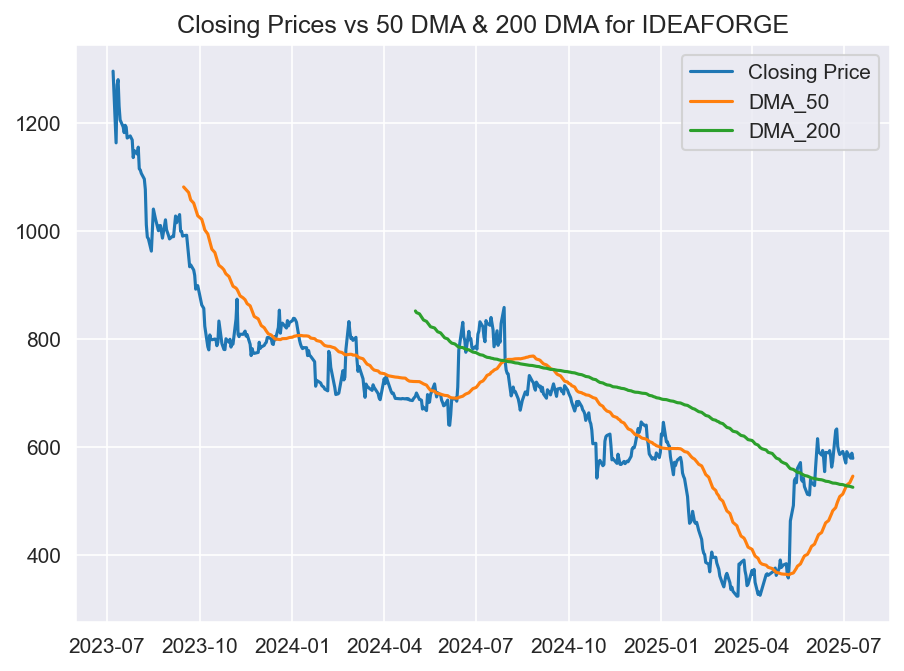

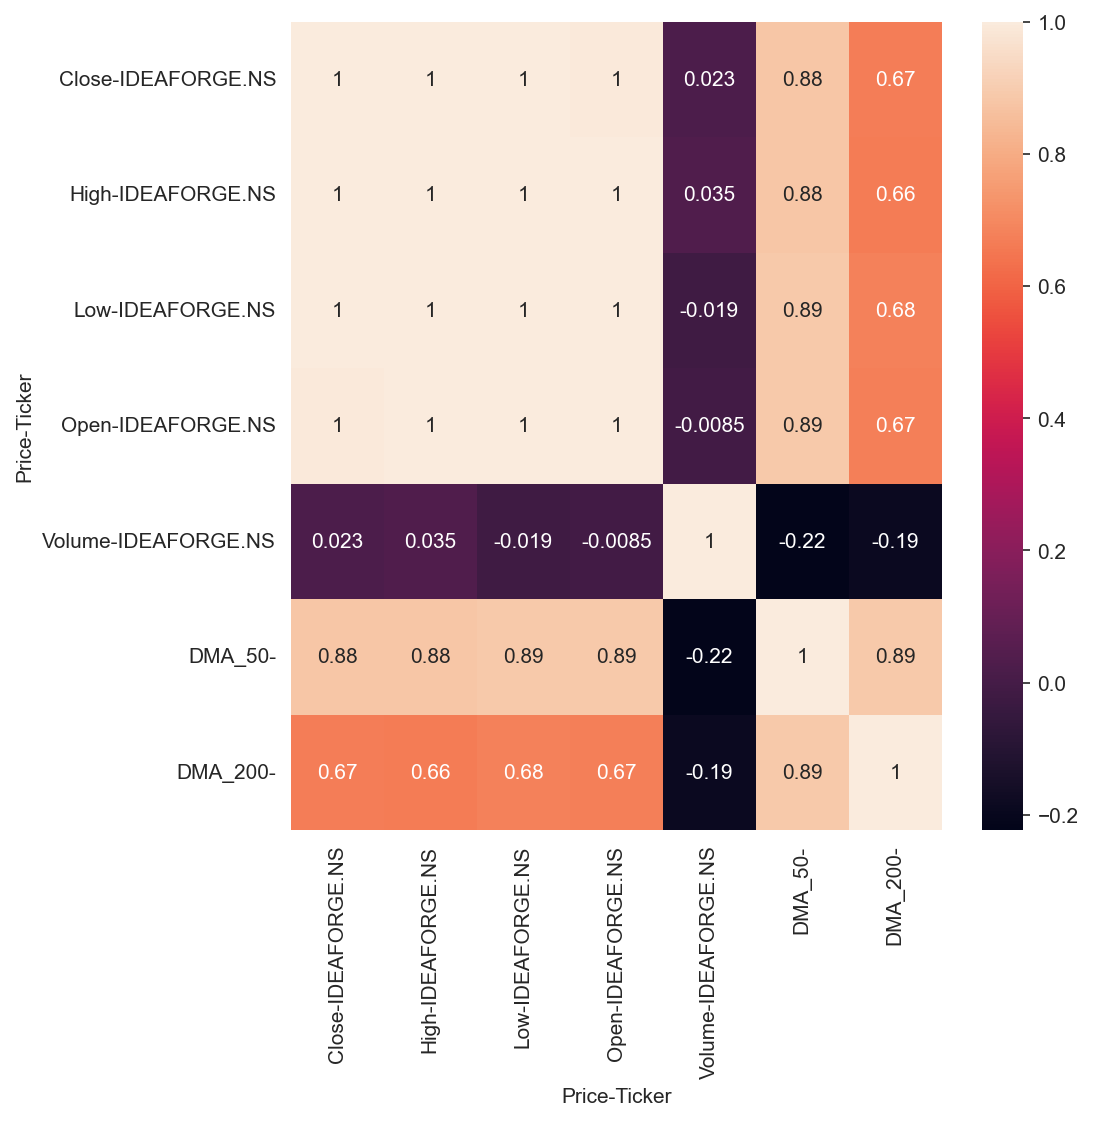

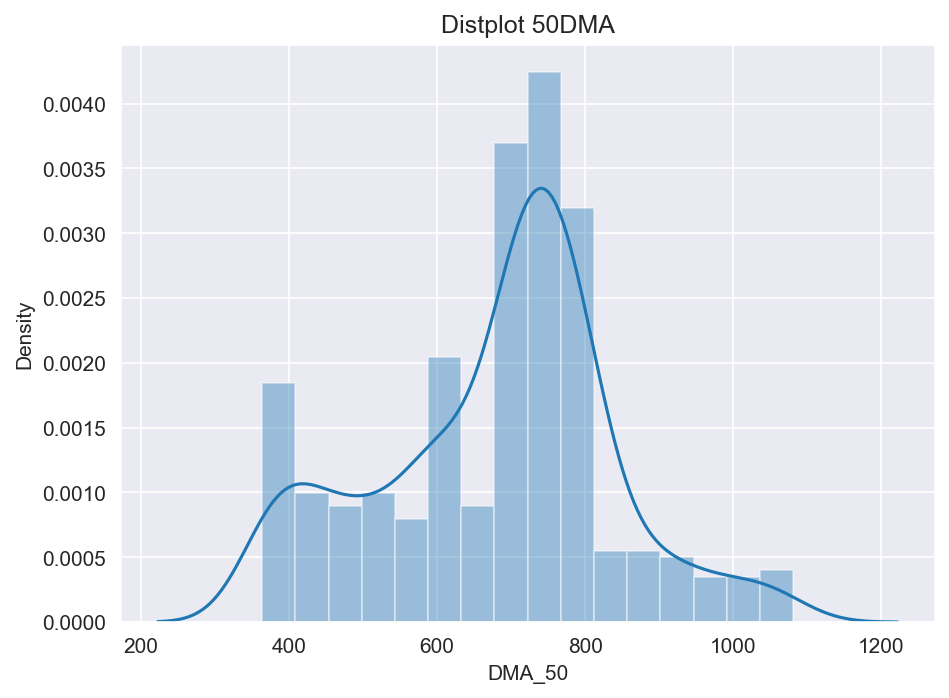

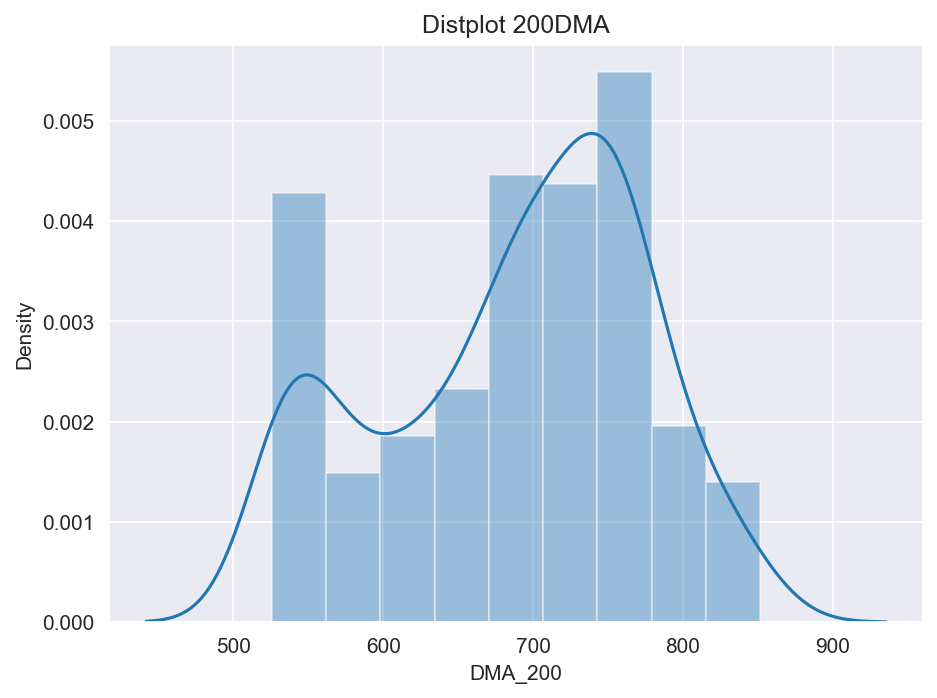

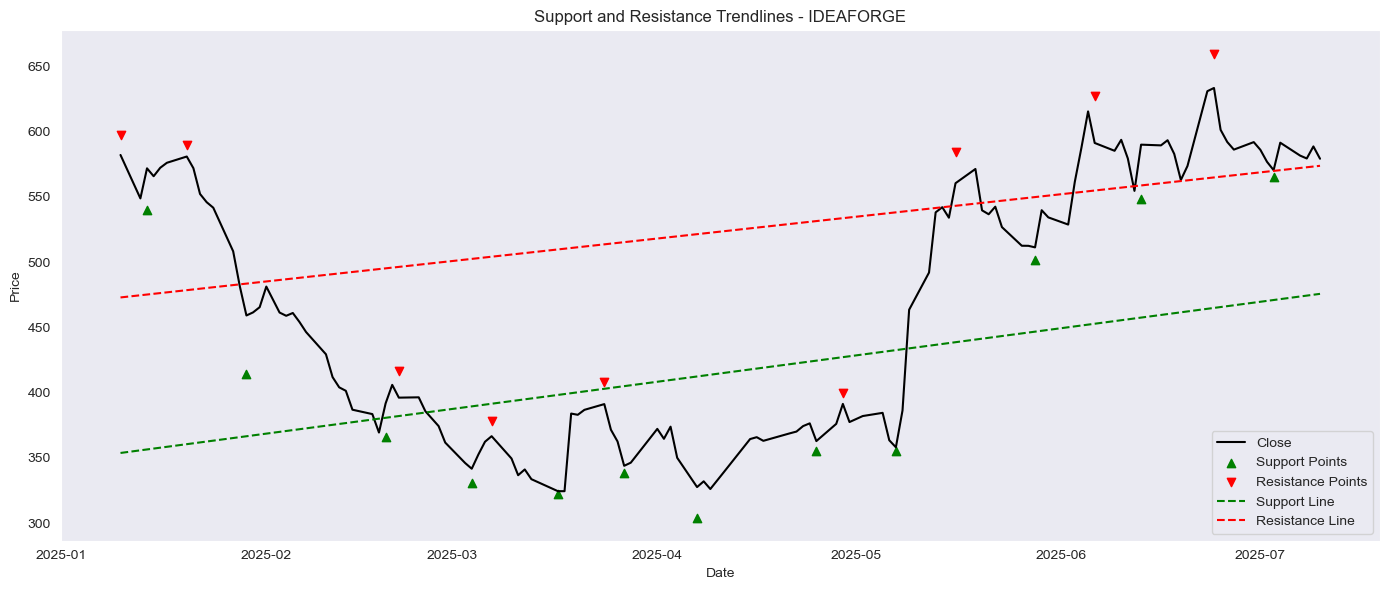

[*********************100%***********************]  1 of 1 completed


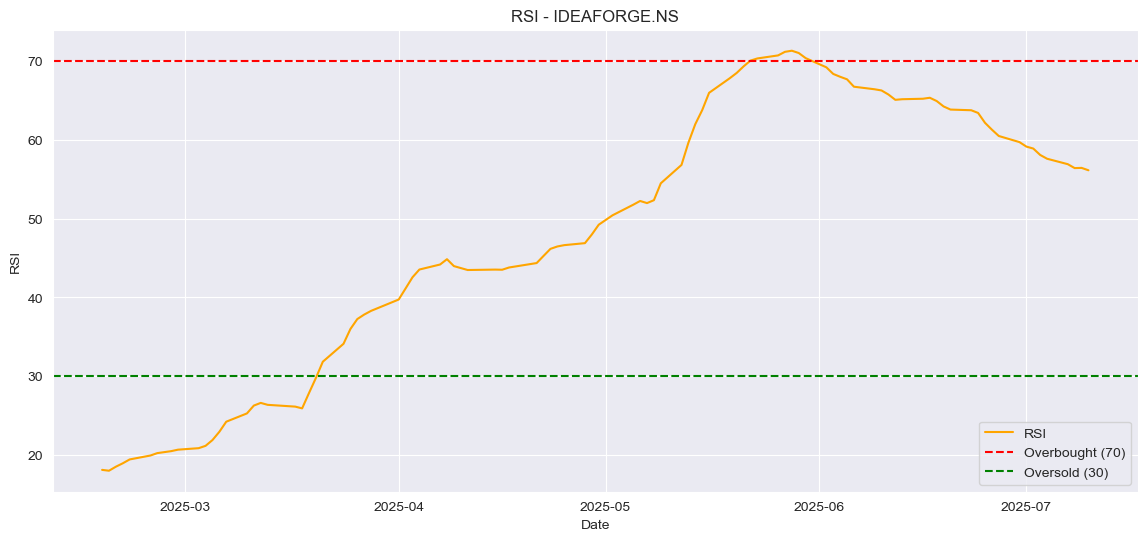

In [32]:
# =============================================================================
# Extract data  
# =============================================================================
if trading_stratergy == '1':
    moving_average(tickers)
    support_resistance(tickers)
    RSI(tickers)
elif trading_stratergy == '2':
    intraday(tickers)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense
import tensorflow as tf
import ta

[*********************100%***********************]  1 of 1 completed


 >> Predicted values of ['IDEAFORGE.NS'] for next 7 days: 




[*********************100%***********************]  1 of 1 completed


Epoch 1/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.1144
Epoch 2/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0626
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0260
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0208
Epoch 5/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0173
Epoch 6/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0137
Epoch 7/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0141
Epoch 8/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0146
Epoch 9/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0130
Epoch 10/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0122
Epoch 11/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0114
Epoch 12/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0111
Epoch 13/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0107
Epoch 14/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0109
Epoch 15/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0087
Epoch 16/25
5/5 ━━━━━━━━━━━━━━━━━━

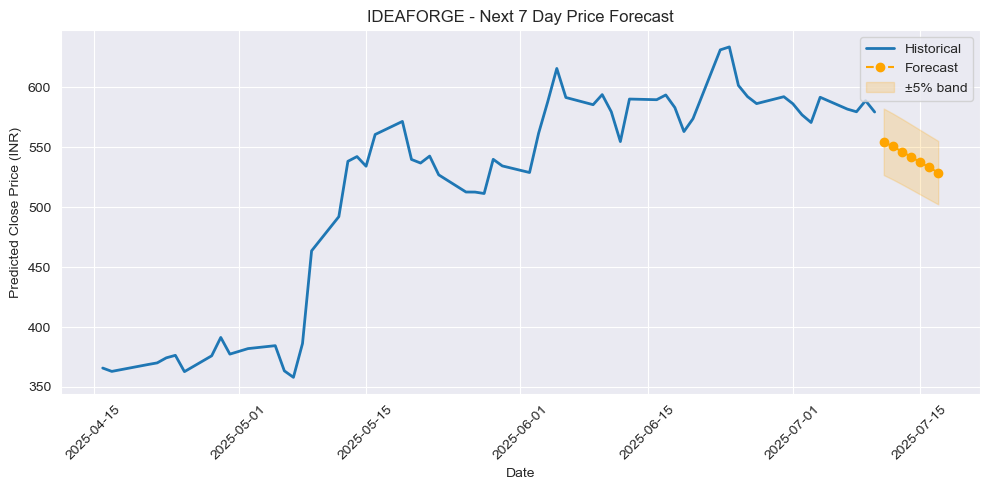

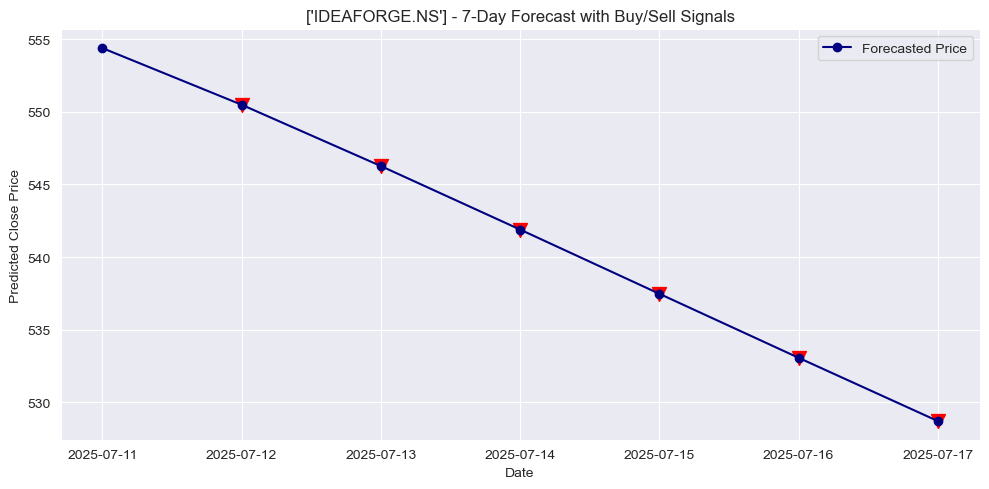

In [38]:
print(f'\n >> Predicted values of {tickers} for next 7 days: \n')
predict_future_values(tickers)